# This script contains the following:
- Import libraries
- Load datasets
- Distribution of brand loyalty
- Average orders per week based on loyalty status
- Orders during the week based on loyalty status
- Orders depending on hour of the day & loyalty status
- Ordering Habits by Age Group and Family Status
- Export


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Load datasets

In [2]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A4_Python/2023.08_Instacart basket analysis/02_data/'
file_path = os.path.join(path, 'prepared data', 'all_data_above_5_orders_V4')

# Import the dataframe
df = pd.read_pickle(file_path)

In [9]:
# Checking loading
df.head()

,number_order_client,orders_day_of_week,order_hour_of_day,product_name,prices,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,gender,state,age_group,income,income_category,region,department,has_pets,fam_status,family_type
0,1,2,8,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
1,2,3,7,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
2,3,3,12,Soda,9.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
3,4,4,7,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
4,5,4,15,Soda,9.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family


In [10]:
df.columns


Index(['number_order_client', 'orders_day_of_week', 'order_hour_of_day',
       'product_name', 'prices', 'busiest_period_of_day', 'loyalty_flag',
       'spending_flag', 'frequency_flag', 'gender', 'state', 'age_group',
       'income', 'income_category', 'region', 'department', 'has_pets',
       'fam_status', 'family_type'],
      dtype='object')

# Distribution of brand loyalty

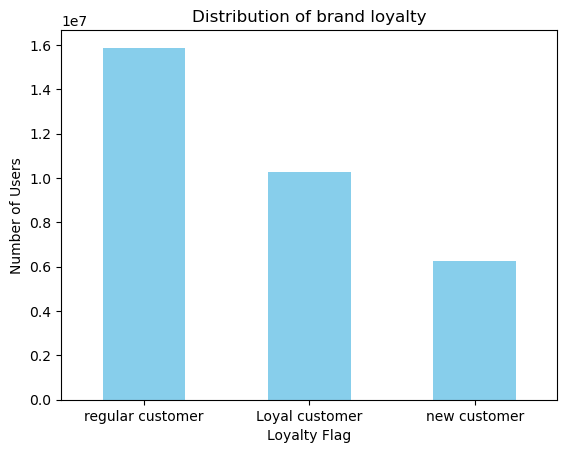

In [6]:
# Count the frequency of each loyalty flag
loyalty_counts = df['loyalty_flag'].value_counts()

# Create a bar chart to visualize the distribution of brand loyalty
loyalty_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of brand loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)  
plt.show()

# Average orders per week based on loyalty status

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'new customer'),
  Text(2, 0, 'regular customer')])

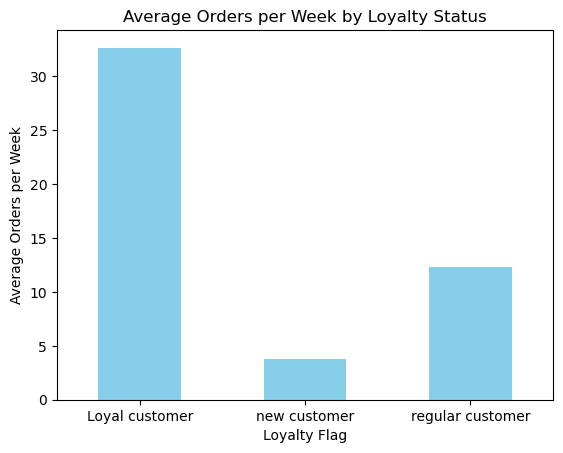

In [11]:
# Group the data by loyalty flag
loyalty_groups = df.groupby('loyalty_flag')

# Calculate and visualize average number of orders per week for each loyalty group
average_orders_per_week = loyalty_groups['number_order_client'].mean()
average_orders_per_week.plot(kind='bar', color='skyblue')

plt.title('Average Orders per Week by Loyalty Status')
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Orders per Week')
plt.xticks(rotation=0)  

  

# Orders during the week based on loyalty status

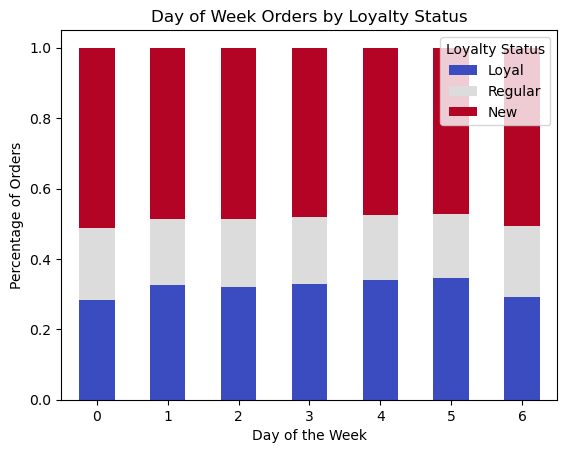

In [12]:
# Create a crosstab of day of the week and loyalty status
day_order_by_loyalty = pd.crosstab(df['orders_day_of_week'], df['loyalty_flag'], normalize='index')

# Plot a stacked bar chart
day_order_by_loyalty.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Day of Week Orders by Loyalty Status')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Orders')
plt.legend(title='Loyalty Status', loc='upper right', labels=['Loyal', 'Regular', 'New'])
plt.xticks(rotation=0)


# Orders depending on hour of the day & loyalty status

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

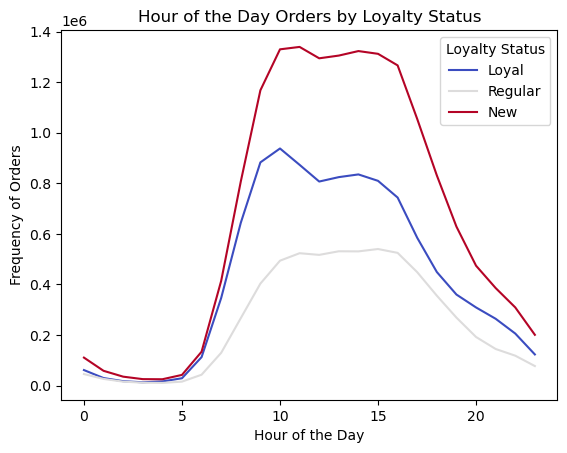

In [15]:
hour_order_by_loyalty = pd.crosstab(df['order_hour_of_day'], df['loyalty_flag'])

# Plot a line chart
hour_order_by_loyalty.plot(kind='line', colormap='coolwarm')

plt.title('Hour of the Day Orders by Loyalty Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Orders')
plt.legend(title='Loyalty Status', loc='upper right', labels=['Loyal', 'Regular', 'New'])
plt.xticks(rotation=0)

Text(0, 0.5, 'Average Price')

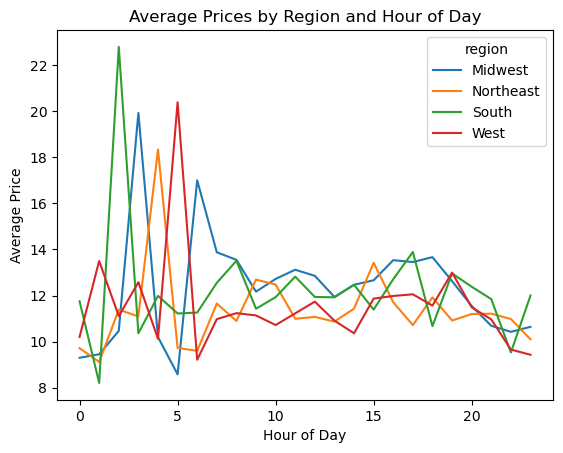

In [23]:
# Define custom colors for the bars
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Group and aggregate data to calculate the average prices by region and hour of the day
region_hour_price = df.groupby(['region', 'order_hour_of_day'])['prices'].mean().reset_index()

# Pivot the data to create a table with 'order_hour_of_day' as the index, 'region' as columns, and 'prices' as values
pivot_data = region_hour_price.pivot(index='order_hour_of_day', columns='region', values='prices')

# Create a line chart to visualize the average prices by region and hour of the day
region_hour_price_line = pivot_data.plot(color= custom_colors) 
plt.title("Average Prices by Region and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Price")


# Ordering Habits by Age Group and Family Status

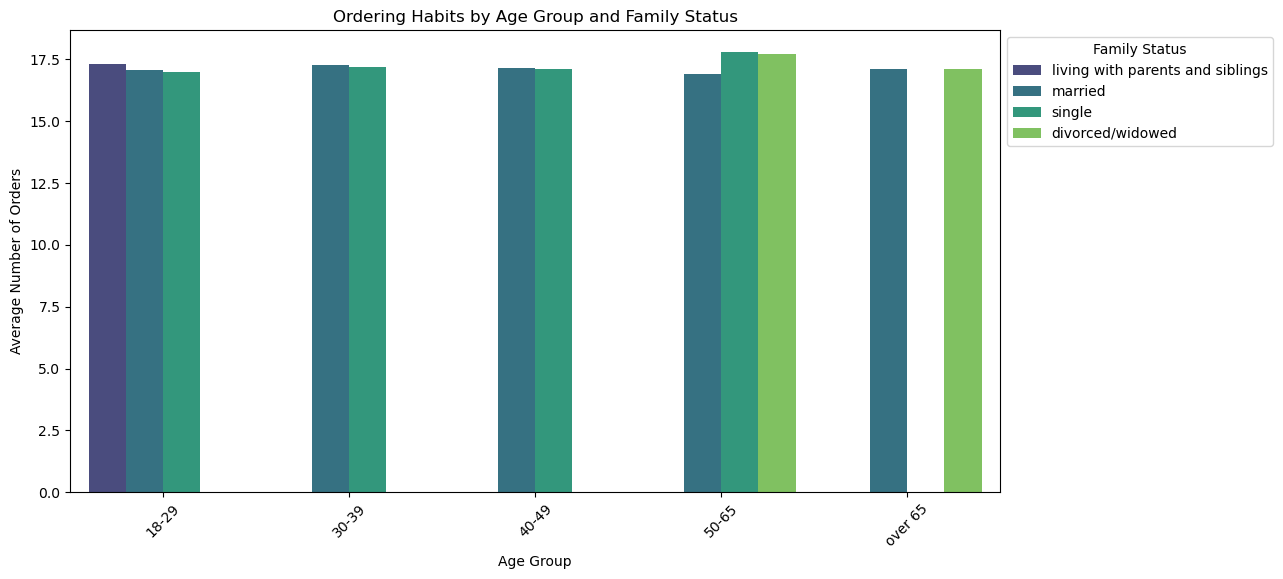

In [24]:
# Group the data by 'age_group' and 'fam_status' and calculate the mean of 'number_order_client'
age_fam_order = df.groupby(['age_group', 'fam_status'])['number_order_client'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='number_order_client', hue='fam_status', data=age_fam_order, palette='viridis')
plt.title("Ordering Habits by Age Group and Family Status")
plt.xlabel("Age Group")
plt.ylabel("Average Number of Orders")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.legend(title="Family Status", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Export

In [5]:
# Export in pickel
df.to_pickle(os.path.join(path,'prepared data','all_data_above_5_orders_V5'))